# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th and come to class . Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
# !curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  8322k      0 --:--:--  0:01:48 --:--:-- 6914k--  0:00:04 --:--:-- 28.0M   0 --:--:--  0:00:36 --:--:-- 8380k-  0:01:02 --:--:-- 3841k  9488k      0 --:--:--  0:01:03 --:--:-- 3333k--:--:--  0:01:08 --:--:-- 4464kk      0 --:--:--  0:01:22 --:--:-- 6746k      0 --:--:--  0:01:30 --:--:-- 10.0M-:--:--  0:01:31 --:--:-- 9675k01:40 --:--:-- 5977k


In [4]:
# !rm SUSY.csv

In [5]:
# !gunzip SUSY.csv.gz

In [7]:
ls -lh

total 5160240
-rw-r--r--@ 1 palomaalvarez  staff   389K Mar 29 16:33 Lab.7.Solution.ipynb
-rw-r--r--  1 palomaalvarez  staff   228M Mar 29 16:32 SUSY-small.csv
-rw-r--r--  1 palomaalvarez  staff   2.2G Mar 16 23:20 SUSY.csv


The data is provided as a comma separated file.

In [1]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [2]:
!ls -lh

total 4669288
-rw-r--r--@ 1 palomaalvarez  staff   387K Mar 29 16:31 Lab.7.Solution.ipynb
-rw-r--r--  1 palomaalvarez  staff   2.2G Mar 16 23:20 SUSY.csv


We see that we have 5 million datapoints.

In [2]:
!wc -l SUSY.csv

 5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [3]:
!head -500000 SUSY.csv > SUSY-small.csv

In [5]:
ls -lh #Smaller file

total 5160816
-rw-r--r--@ 1 palomaalvarez  staff   387K Mar 29 16:31 Lab.7.Solution.ipynb
-rw-r--r--  1 palomaalvarez  staff   228M Mar 29 16:32 SUSY-small.csv
-rw-r--r--  1 palomaalvarez  staff   2.2G Mar 16 23:20 SUSY.csv


In [6]:
! wc -l SUSY-small.csv

  500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [2]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [3]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [4]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [5]:
FeatureNames

['M_Delta_R',
 'dPhi_r_b',
 'S_R',
 'M_R',
 'MT2',
 'M_TR_2',
 'R',
 'MET_rel',
 'cos_theta_r1',
 'axial_MET']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [7]:
filename = "SUSY-small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [19]:
df

signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0          0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1          1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2          1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3          1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4          1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...        ...       ...       ...       ...       ...       ...       ...   
499995     0.0  0.719035  1.091879  0.291540  1.205962 -1.599117 -1.139445   
499996     1.0  0.910016 -0.364544 -0.777120  0.543648 -0.910632 -1.723707   
499997     1.0  0.842954  0.332476 -1.048564  1.347989  0.320496 -0.666358   
499998     0.0  1.370760 -1.162912  0.893499  2.118091  1.248496 -0.887211   
499999     0.0  0.762400  0.440924  0.342885  1.034283  1.740353 -1.083314   

             MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2         R  \
0       0.567765 -0.175000  0.810061  -0.252552  1.921887  0.889637  0.410772   
1       3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051  0.481928   
2       1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514  1.587535   
3       2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211  1.582217   
4       1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218  0.728563   
...          ...       ...       ...        ...       ...       ...       ...   
499995  0.424546  1.154849  0.637185  -0.091178  1.972156  0.697028  0.313636   
499996  2.864673  1.458272  2.176558  -0.590911  0.673695  1.662140  2.189362   
499997  0.450433 -0.411872  0.293407   0.630491  0.859920  0.403371  0.416258   
499998  0.164659  0.316840  0.215165   0.280418  3.087083  0.526929  0.151467   
499999  0.872145 -1.519894  0.284328  -0.360861  0.956828  0.965979  0.895881   

             MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
0       1.145621  1.932632   0.994464  1.367815      0.040714  
1       0.000000  0.448410   0.205356  1.321893      0.377584  
2       2.024308  0.603498   1.562374  1.135454      0.180910  
3       1.551914  0.761215   1.715464  1.492257      0.090719  
4       0.000000  1.083158   0.043429  1.154854      0.094859  
...          ...       ...        ...       ...           ...  
499995  0.988602  1.981573   0.744828  1.095080      0.006546  
499996  1.195041  0.910815   1.181893  1.252362      0.826035  
499997  0.591989  0.372003   0.716788  0.366991      0.265798  
499998  0.308067  3.098183   0.233042  0.876216      0.000593  
499999  1.020396  0.996446   0.943458  1.299870      0.197220  

[500000 rows x 19 columns]

The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [20]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


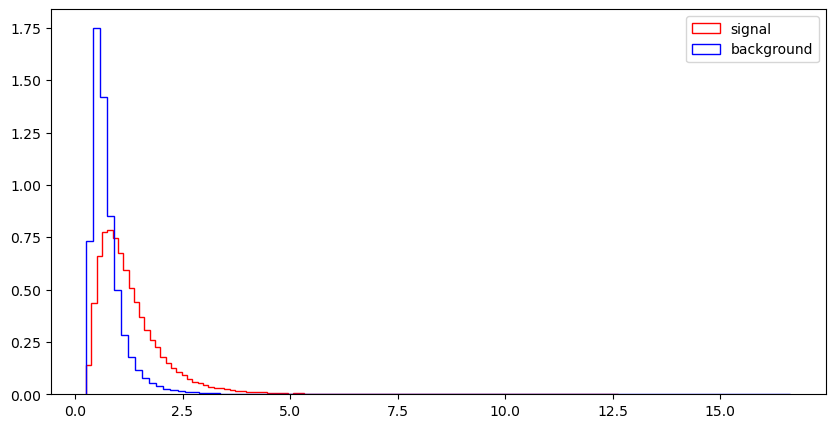

l_1_eta


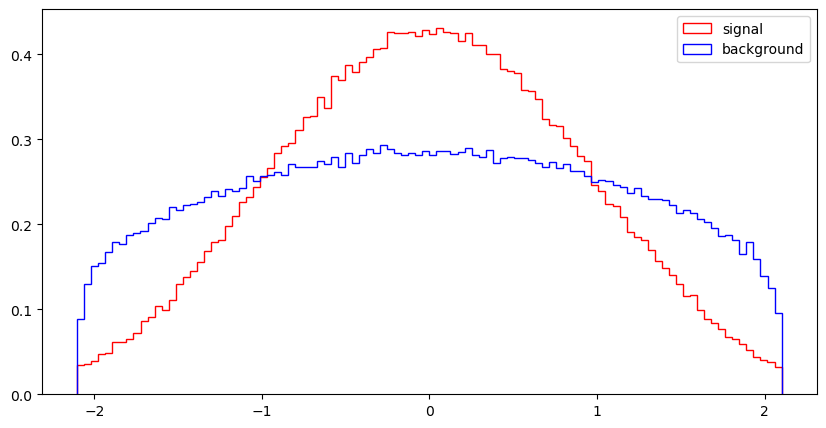

l_1_phi


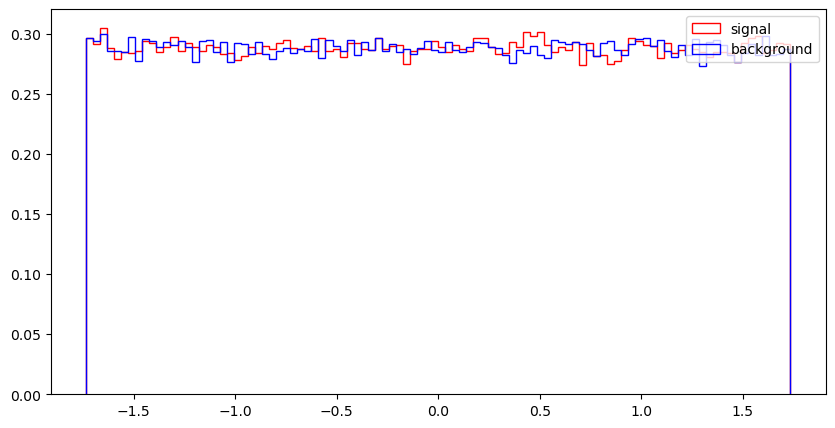

l_2_pT


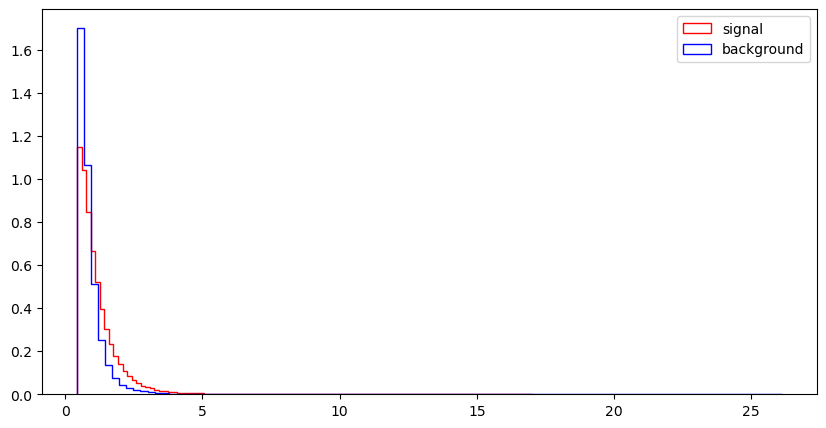

l_2_eta


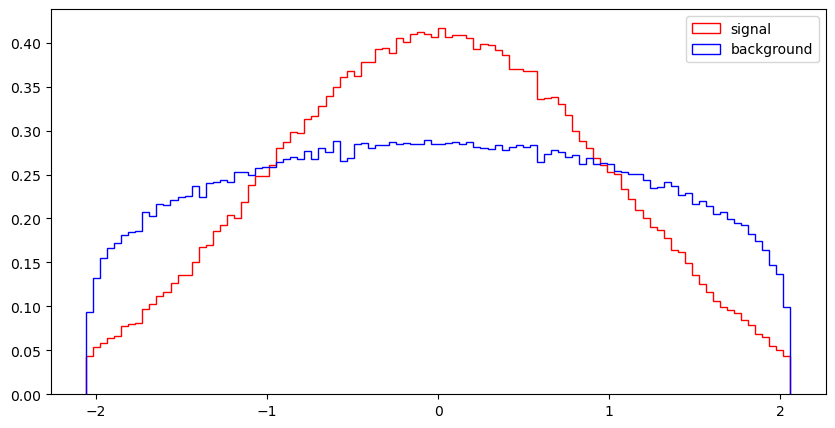

l_2_phi


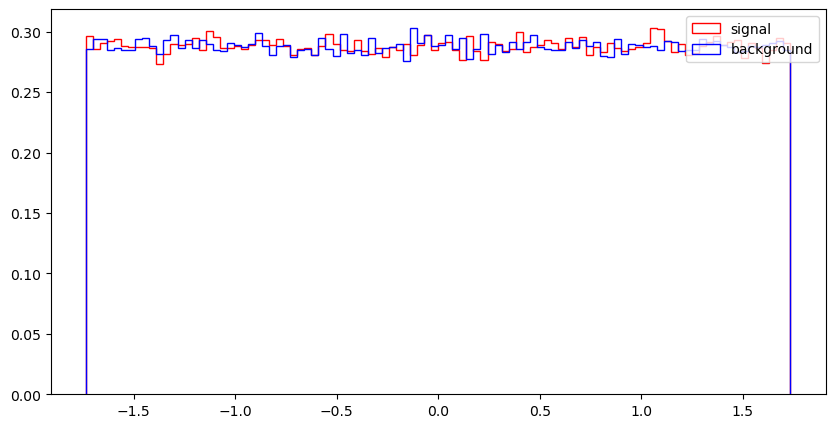

MET


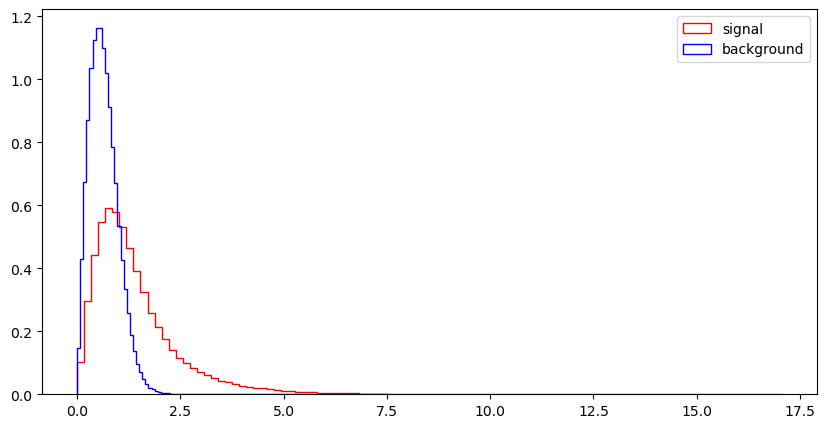

MET_phi


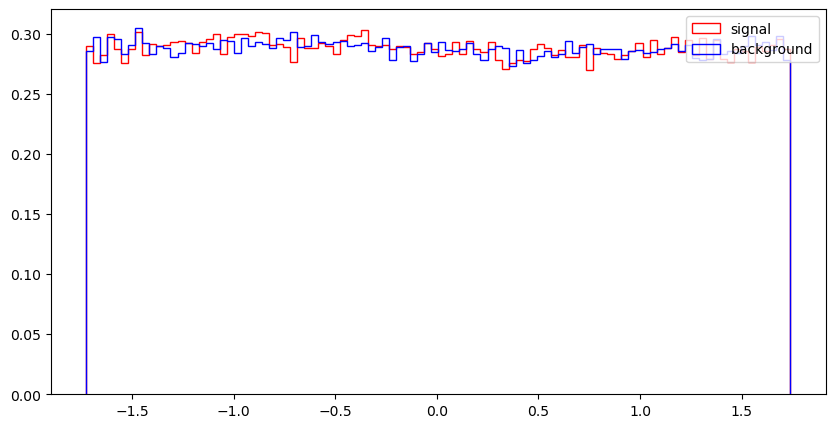

MET_rel


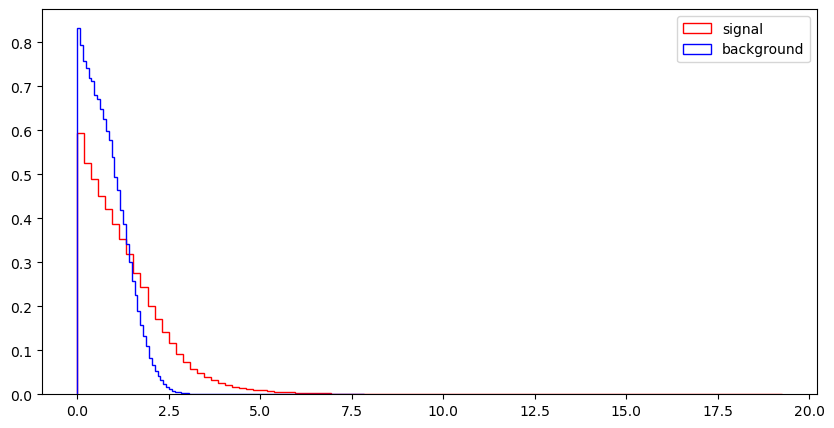

axial_MET


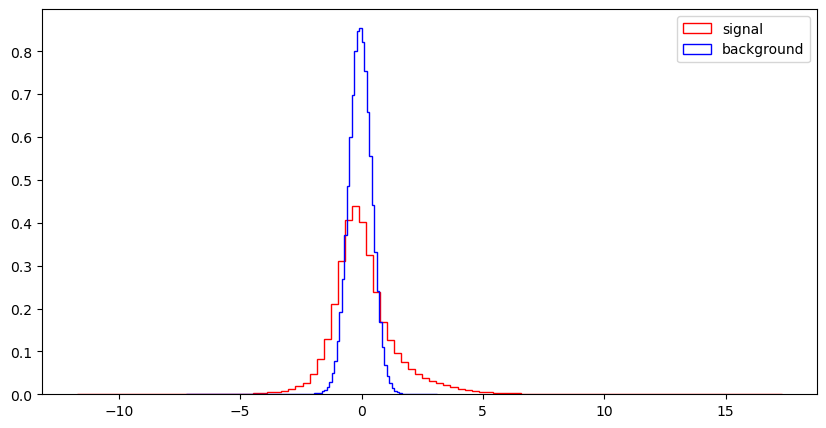

M_R


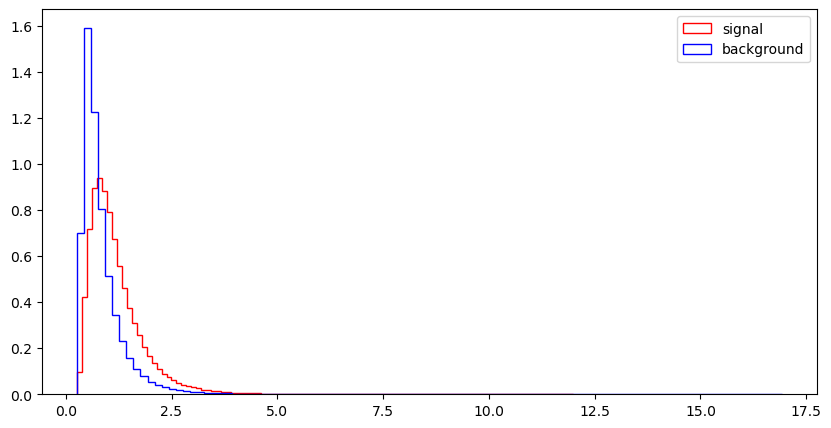

M_TR_2


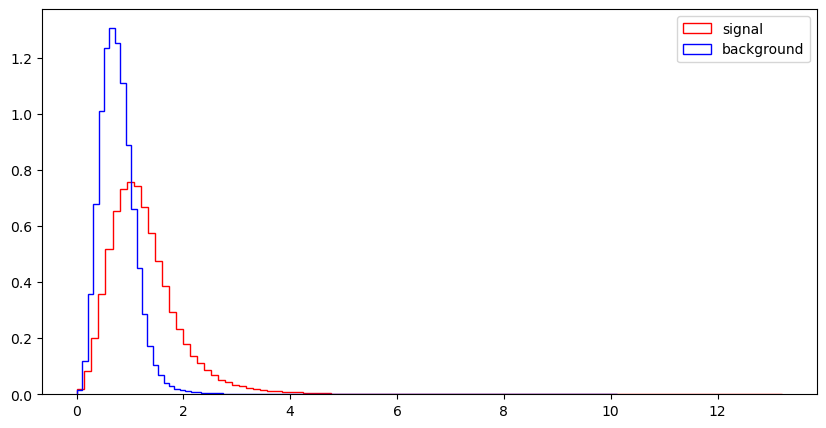

R


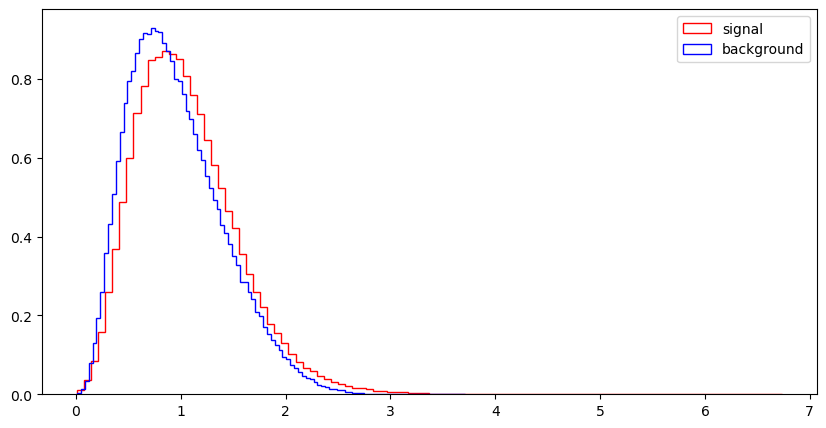

MT2


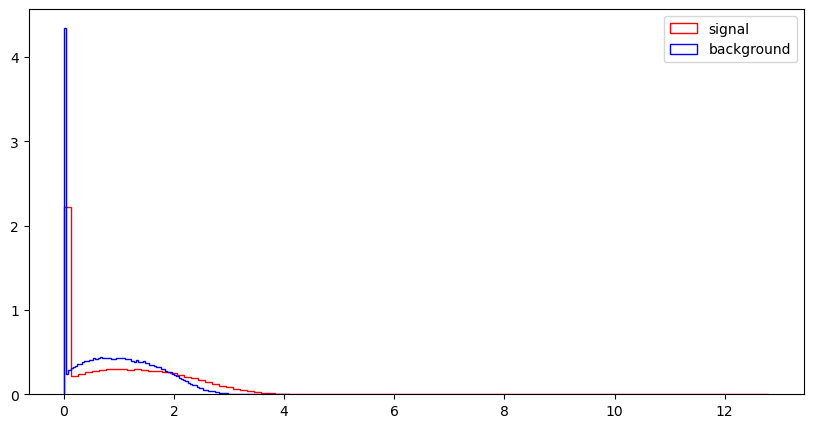

S_R


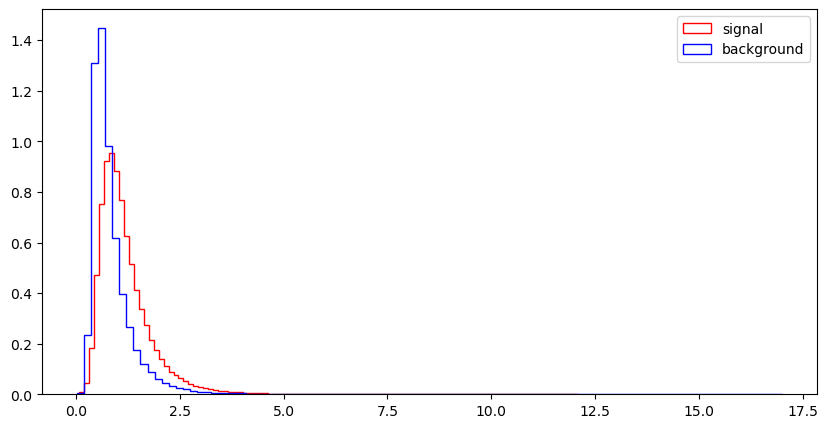

M_Delta_R


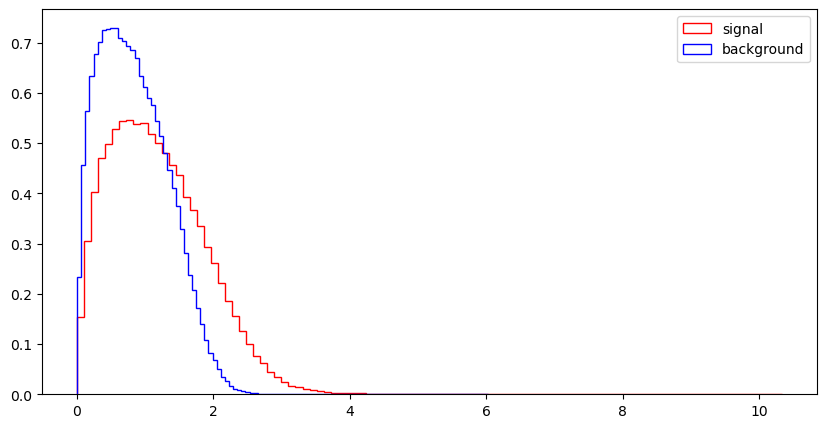

dPhi_r_b


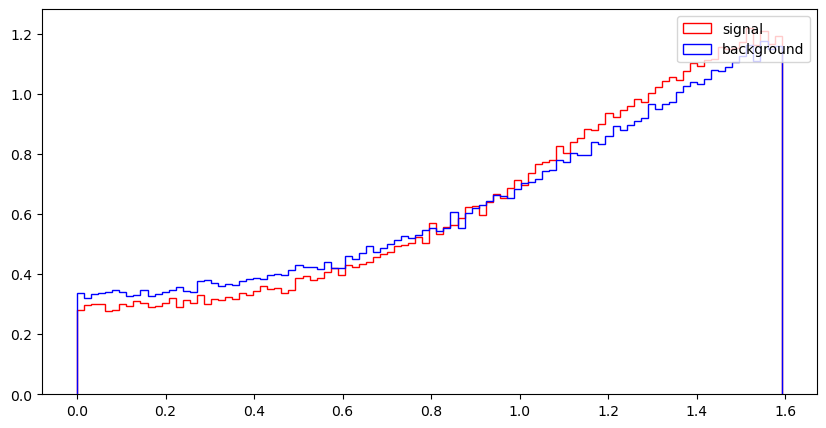

cos_theta_r1


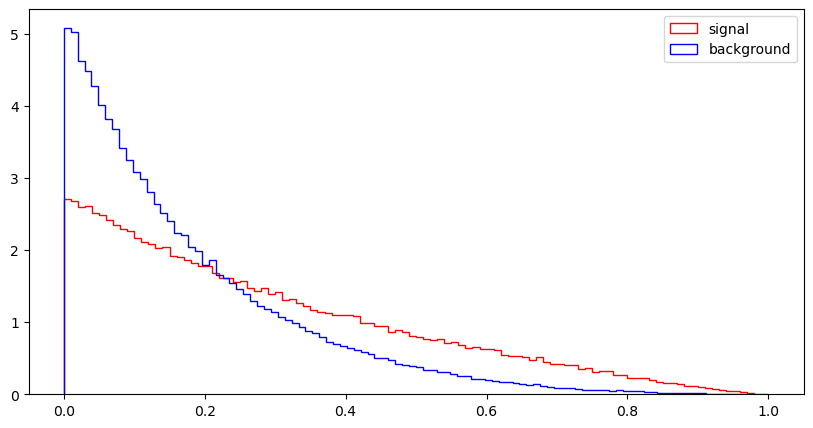

In [21]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

In [22]:
df_sig.columns

Index(['signal', 'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta',
       'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'],
      dtype='object')

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

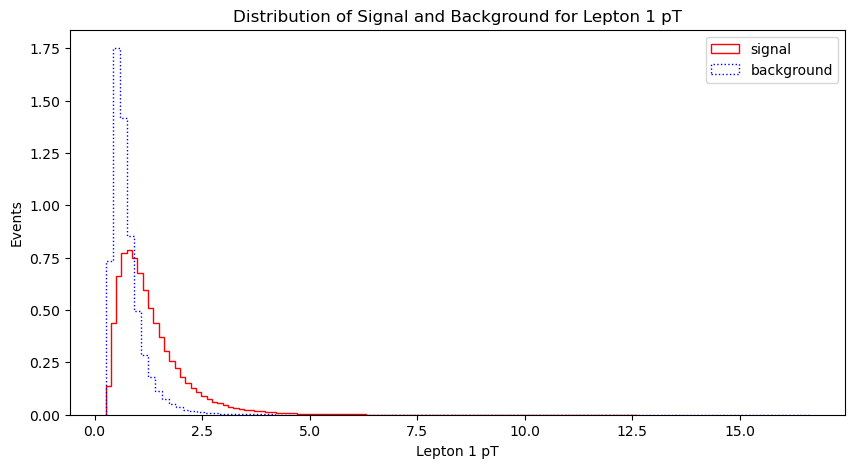

In [37]:
plt.figure(figsize=(10,5))
plt.hist(np.array(df_sig["l_1_pT"]),bins=100,histtype="step", color="red",label="signal",density=1,stacked=True)
plt.hist(np.array(df_bkg["l_1_pT"]),bins=100,histtype="step", color="blue", label="background", linestyle='dotted',density=1, stacked=True)
plt.legend(loc='upper right')
plt.title('Distribution of Signal and Background for Lepton 1 pT')
plt.xlabel('Lepton 1 pT')
plt.ylabel('Events')
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [29]:
def compare_distributions(df, column_name, selections, ax, **kwargs):
    for label, selection in selections.items():        
        ax.hist(df[selection][column_name], label=label, **kwargs)
    
    ax.legend()

def compare_scatter(df, x_var_name, y_var_name, selections, ax, make_legend=True):
    for label, selection in selections.items():   
        ax.scatter(df[selection][x_var_name], df[selection][y_var_name], label=label, alpha=0.5)

    ax.set_xlabel(x_var_name)
    ax.set_ylabel(y_var_name)

    if make_legend:
        ax.legend()

In [12]:
#Select 8 low-level features
df_low=df[['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta','l_2_phi', 'MET', 'MET_phi']] 

selection_dict = {"Signal": df['signal'] == 1,      
                "Background": df['signal'] == 0}


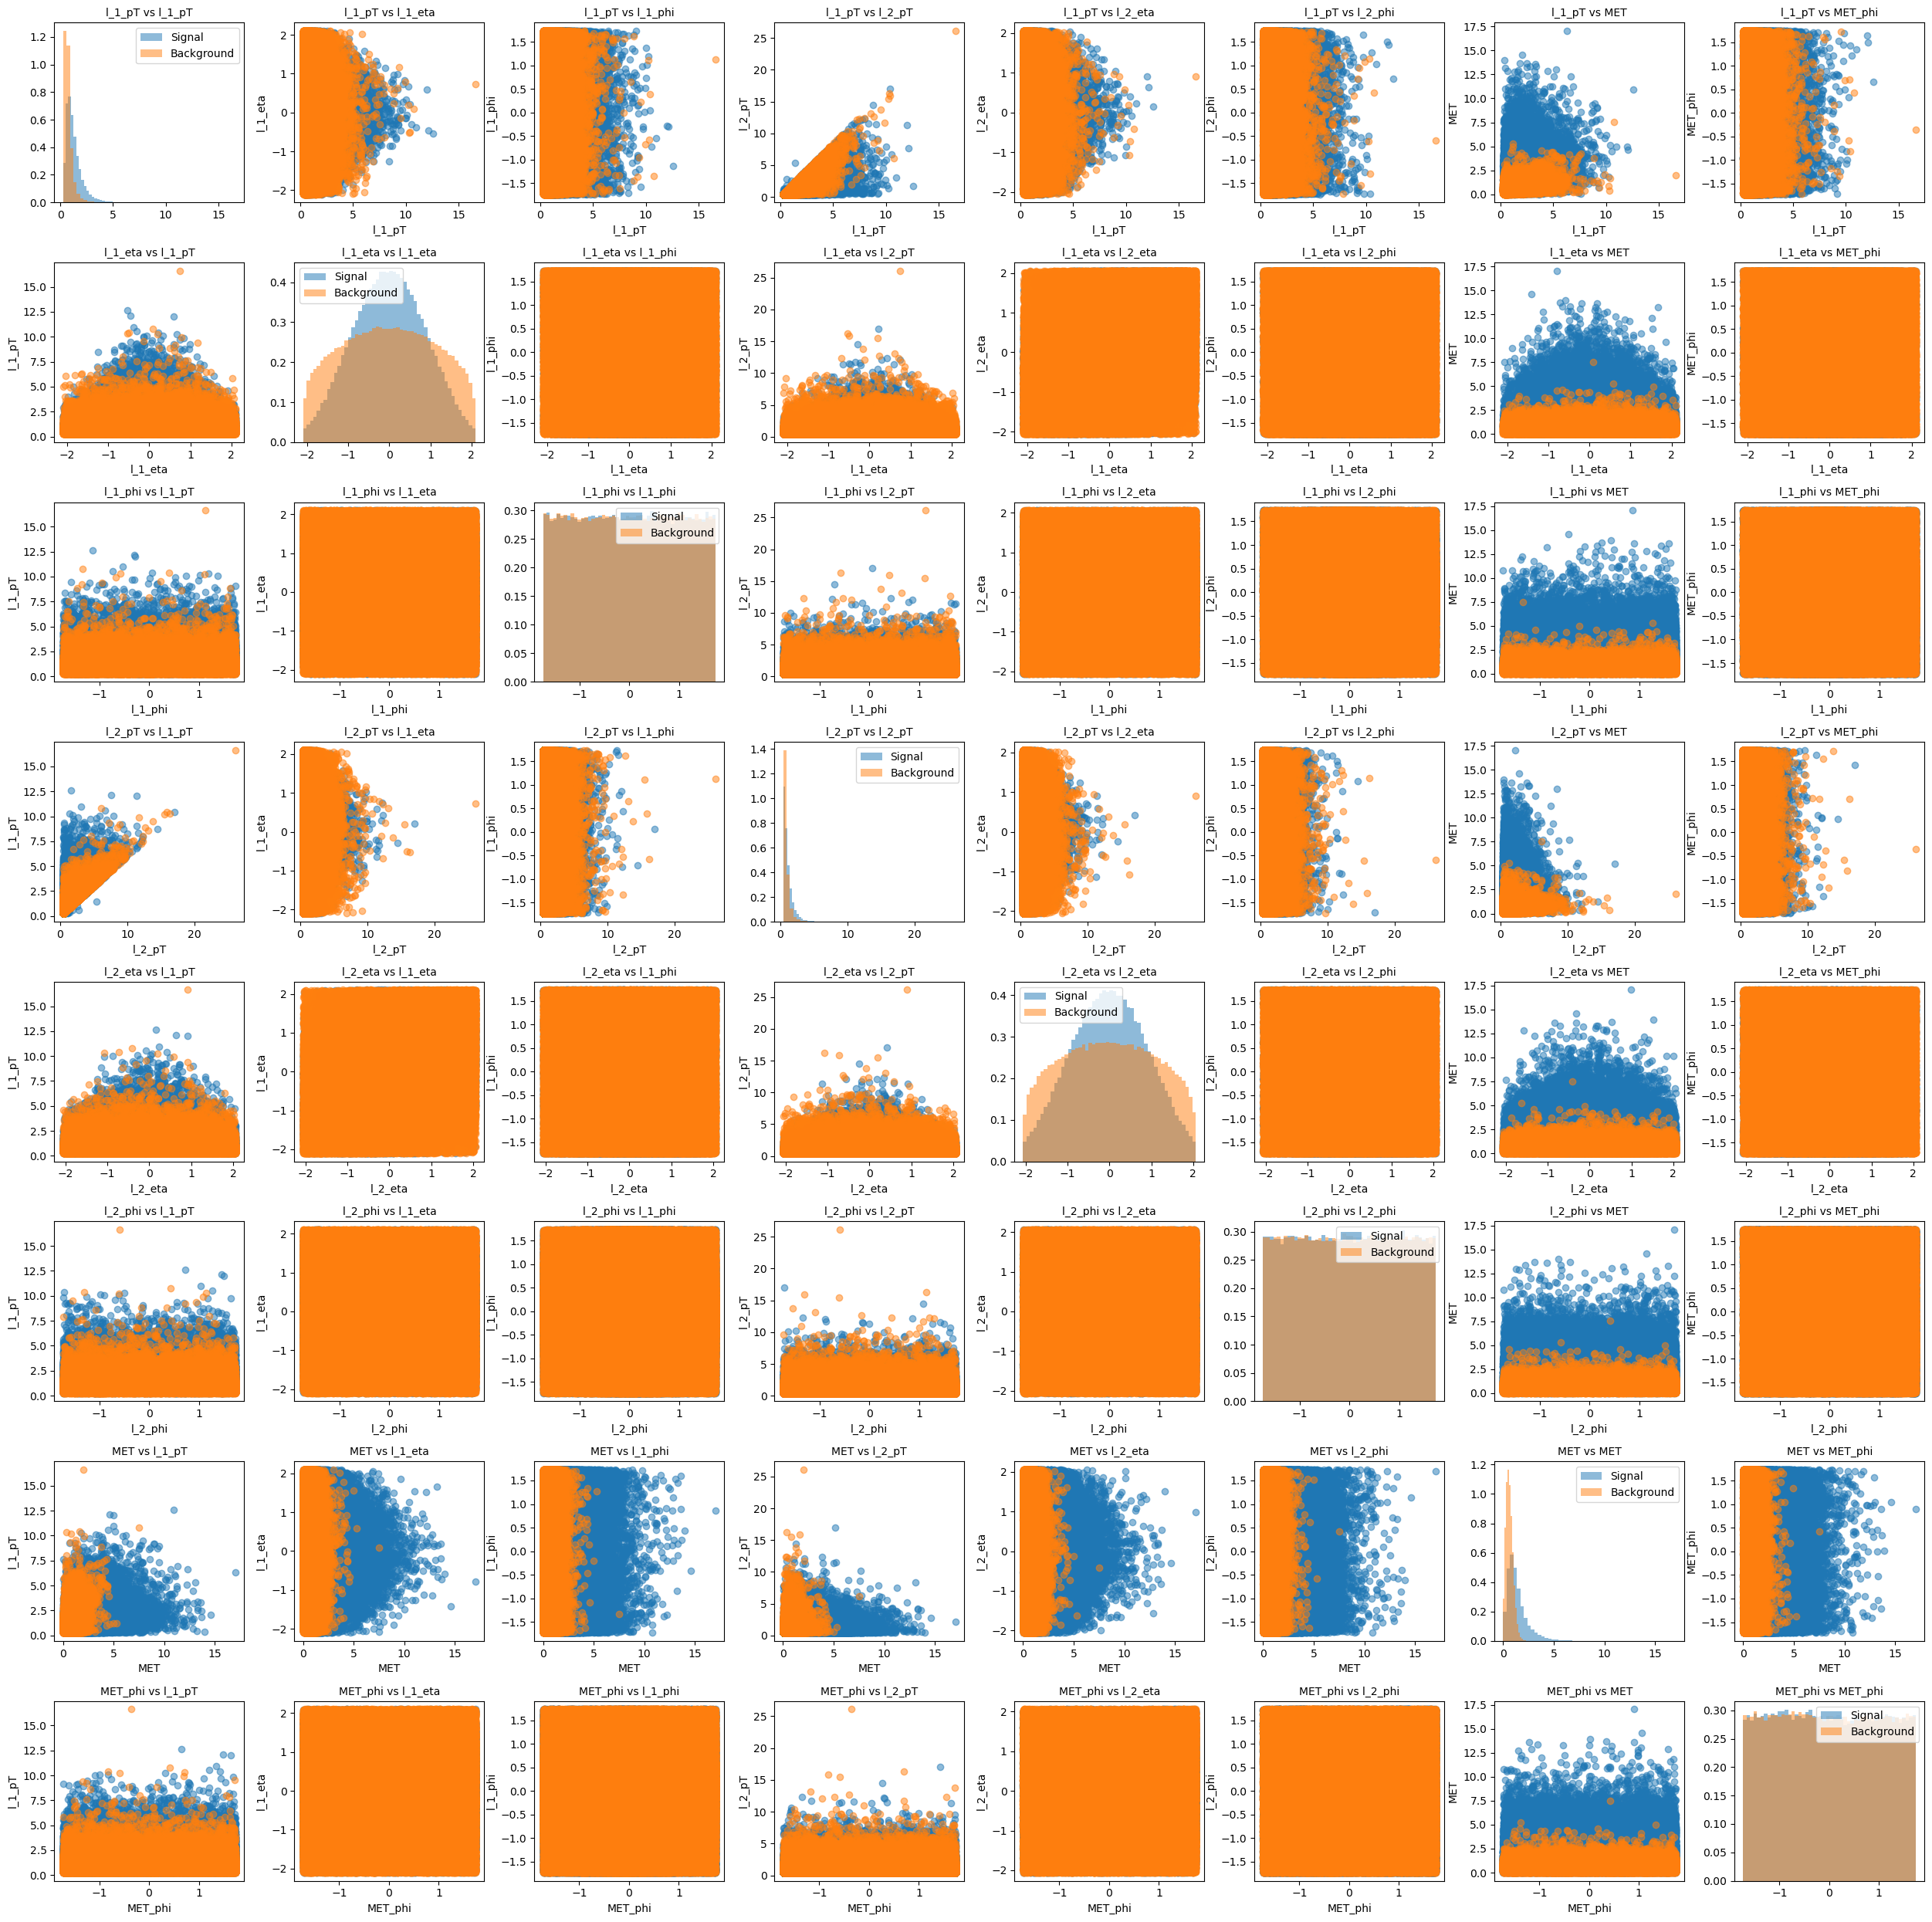

CPU times: user 56.6 s, sys: 1.68 s, total: 58.3 s
Wall time: 58.7 s


In [31]:
%%time
#Part a: Pair plot for low level features 


columns = df_low.columns[:]
n_columns = len(columns)

fig, axes = plt.subplots(n_columns, n_columns, figsize=(25, 25), sharex=False, sharey=False)

for i, x_var_name in enumerate(columns):
    for j, y_var_name in enumerate(columns):
        ax = axes[i, j]  #Get subplot at (i, j)

        make_legend = (i == 0 and j == 0) #Add a legend to the first plot

        #Get signal vs background histogram for same feature
        if i == j:
            compare_distributions(df_low, x_var_name, selection_dict, ax, alpha=0.5, density=True, bins=50)
        else:
            compare_scatter(df_low, x_var_name, y_var_name, selection_dict, ax, make_legend=make_legend)

        ax.set_title(f"{x_var_name} vs {y_var_name}", fontsize=10)

plt.tight_layout()
plt.show()


In [13]:
#Select 10 high-level features
df_high=df[['M_TR_2',
 'S_R',
 'R',
 'cos_theta_r1',
 'dPhi_r_b',
 'MET_rel',
 'MT2',
 'M_R',
 'axial_MET',
 'M_Delta_R']] 

selection_dict_high = {"Signal": df['signal'] == 1,      
                    "Background": df['signal'] == 0}

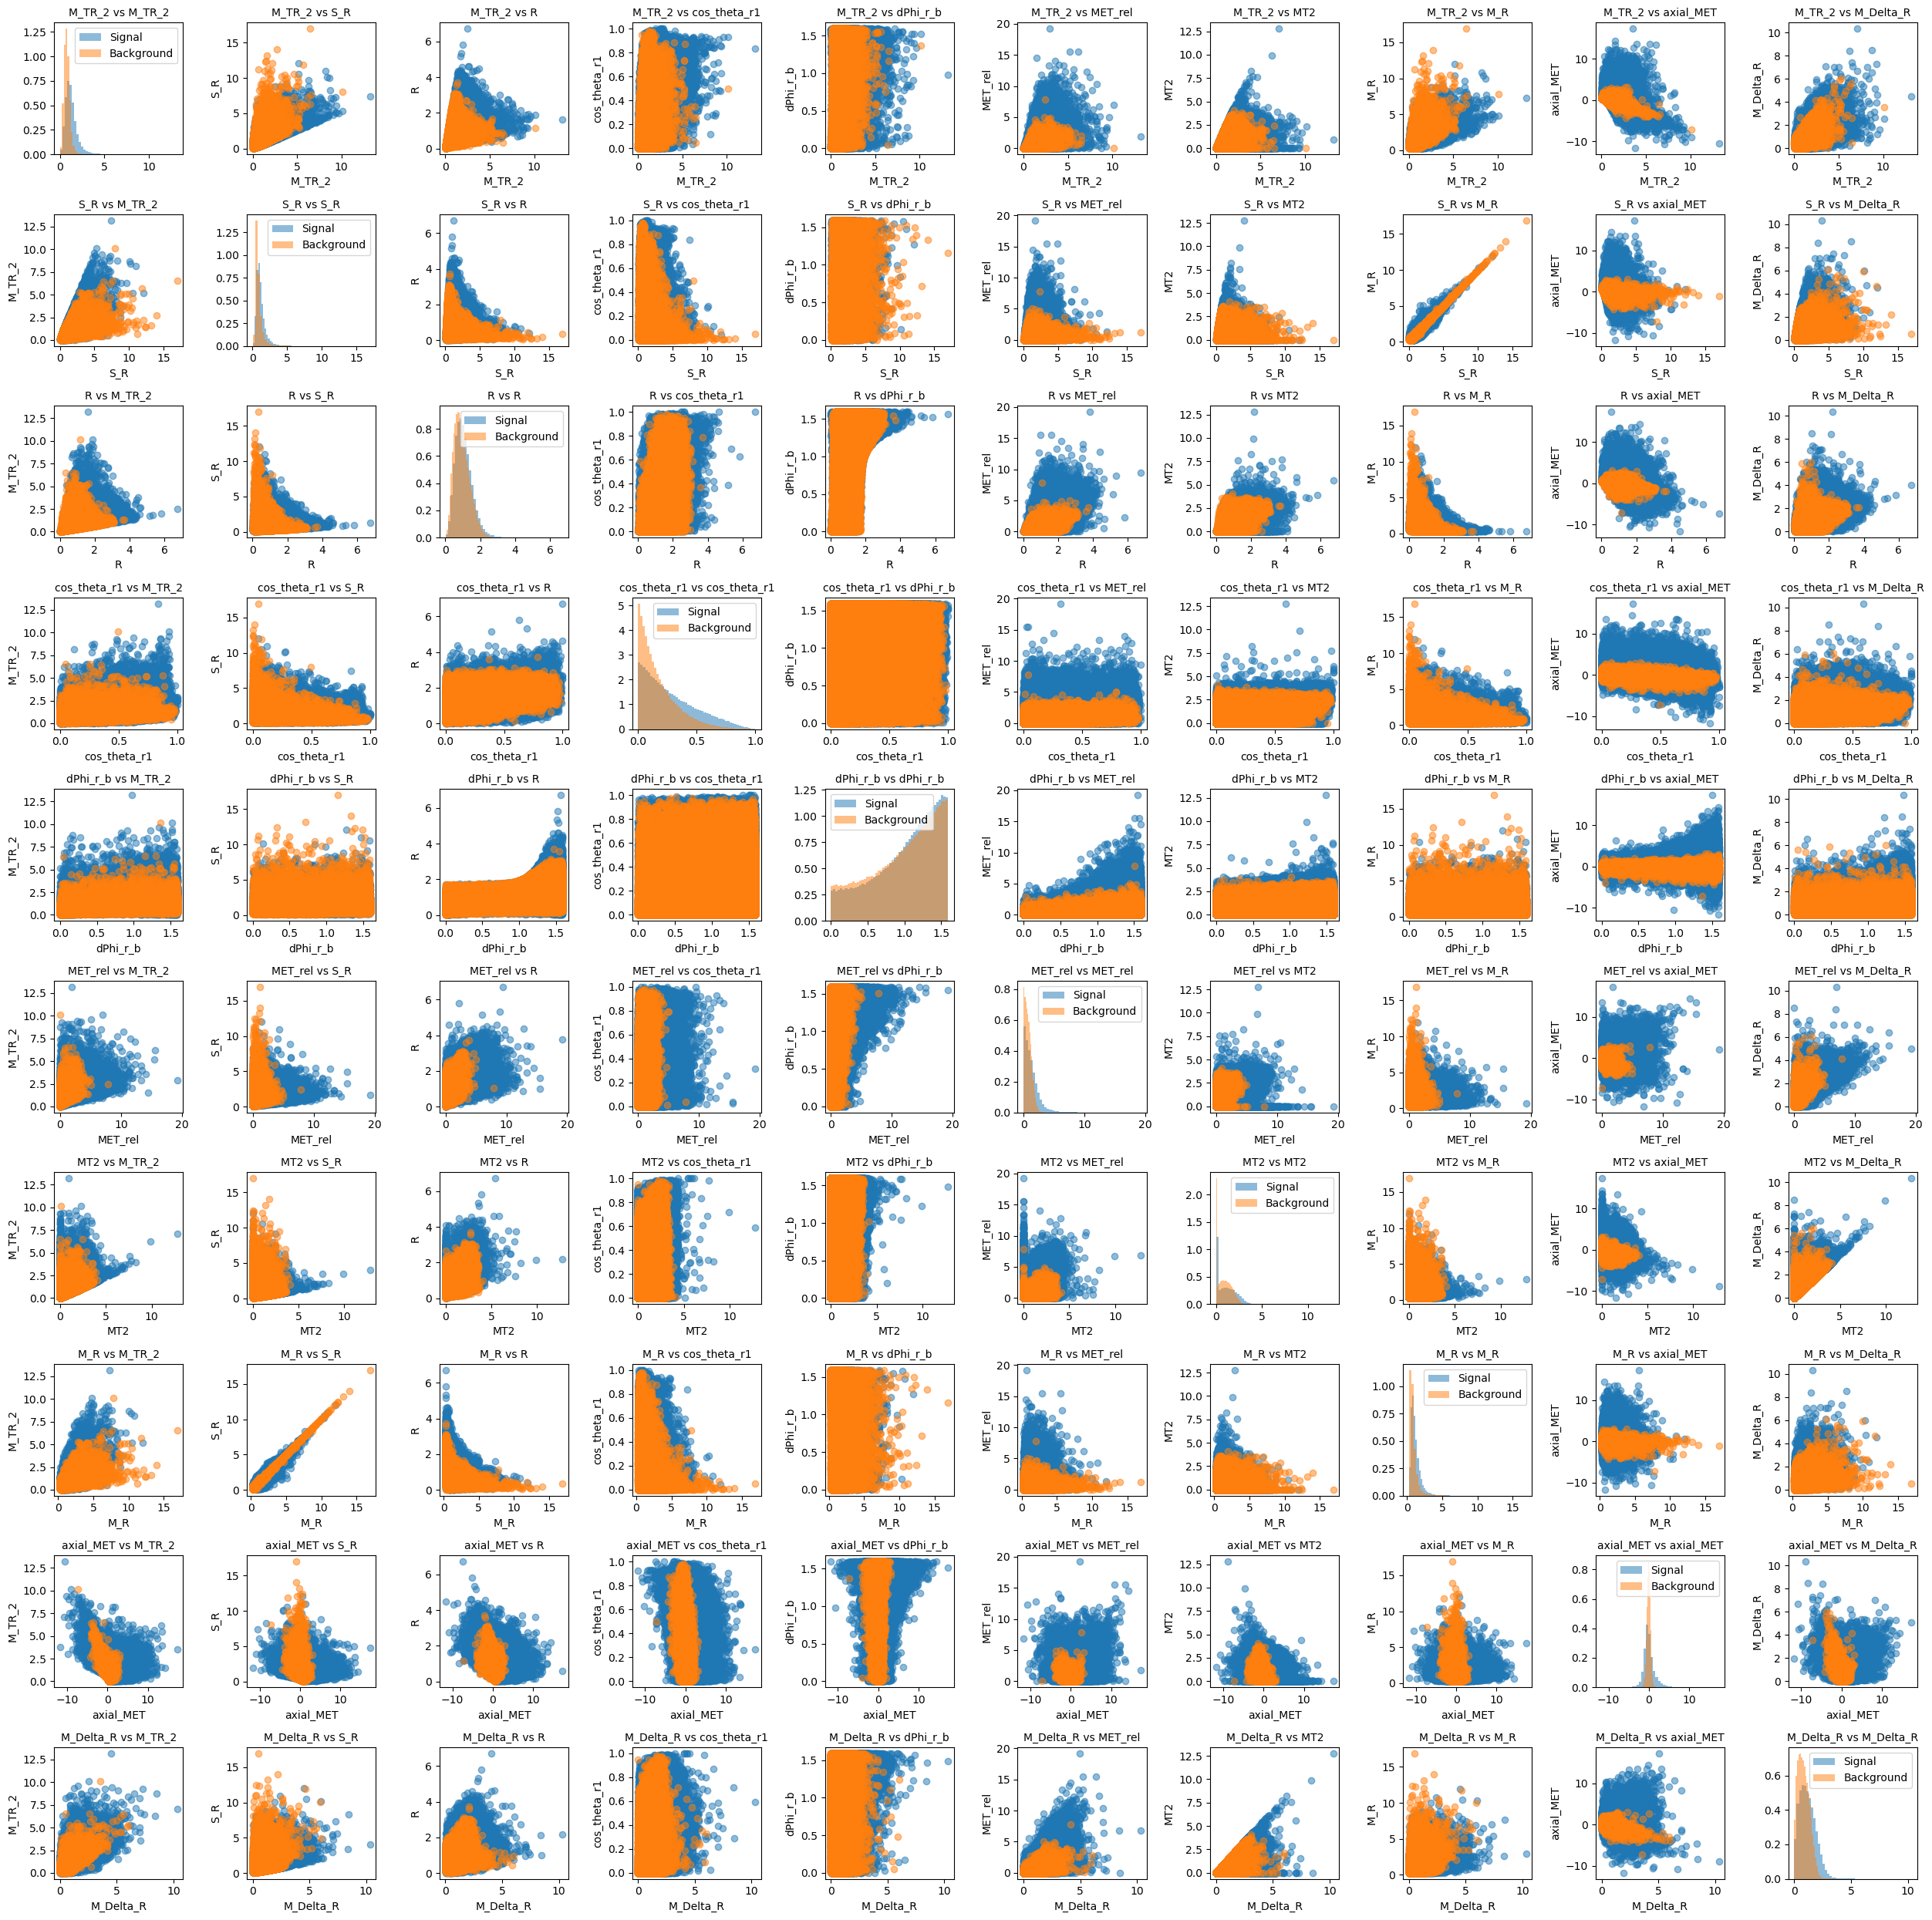

CPU times: user 1min 29s, sys: 3.48 s, total: 1min 32s
Wall time: 1min 34s


In [33]:
%%time
#Part a: Pair plot for high-level features


columns = df_high.columns[:]
n_columns = len(columns)

fig, axes = plt.subplots(n_columns, n_columns, figsize=(25, 25), sharex=False, sharey=False)

for i, x_var_name in enumerate(columns):
    for j, y_var_name in enumerate(columns):
        ax = axes[i, j]  #Get subplot at (i, j)

        make_legend = (i == 0 and j == 0) #Add a legend to the first plot

        #Get signal vs background histogram for same feature
        if i == j:
            compare_distributions(df_high, x_var_name, selection_dict_high, ax, alpha=0.5, density=True, bins=50)
        else:
            compare_scatter(df_high, x_var_name, y_var_name, selection_dict_high, ax, make_legend=make_legend)

        ax.set_title(f"{x_var_name} vs {y_var_name}", fontsize=10)

plt.tight_layout()
plt.show()


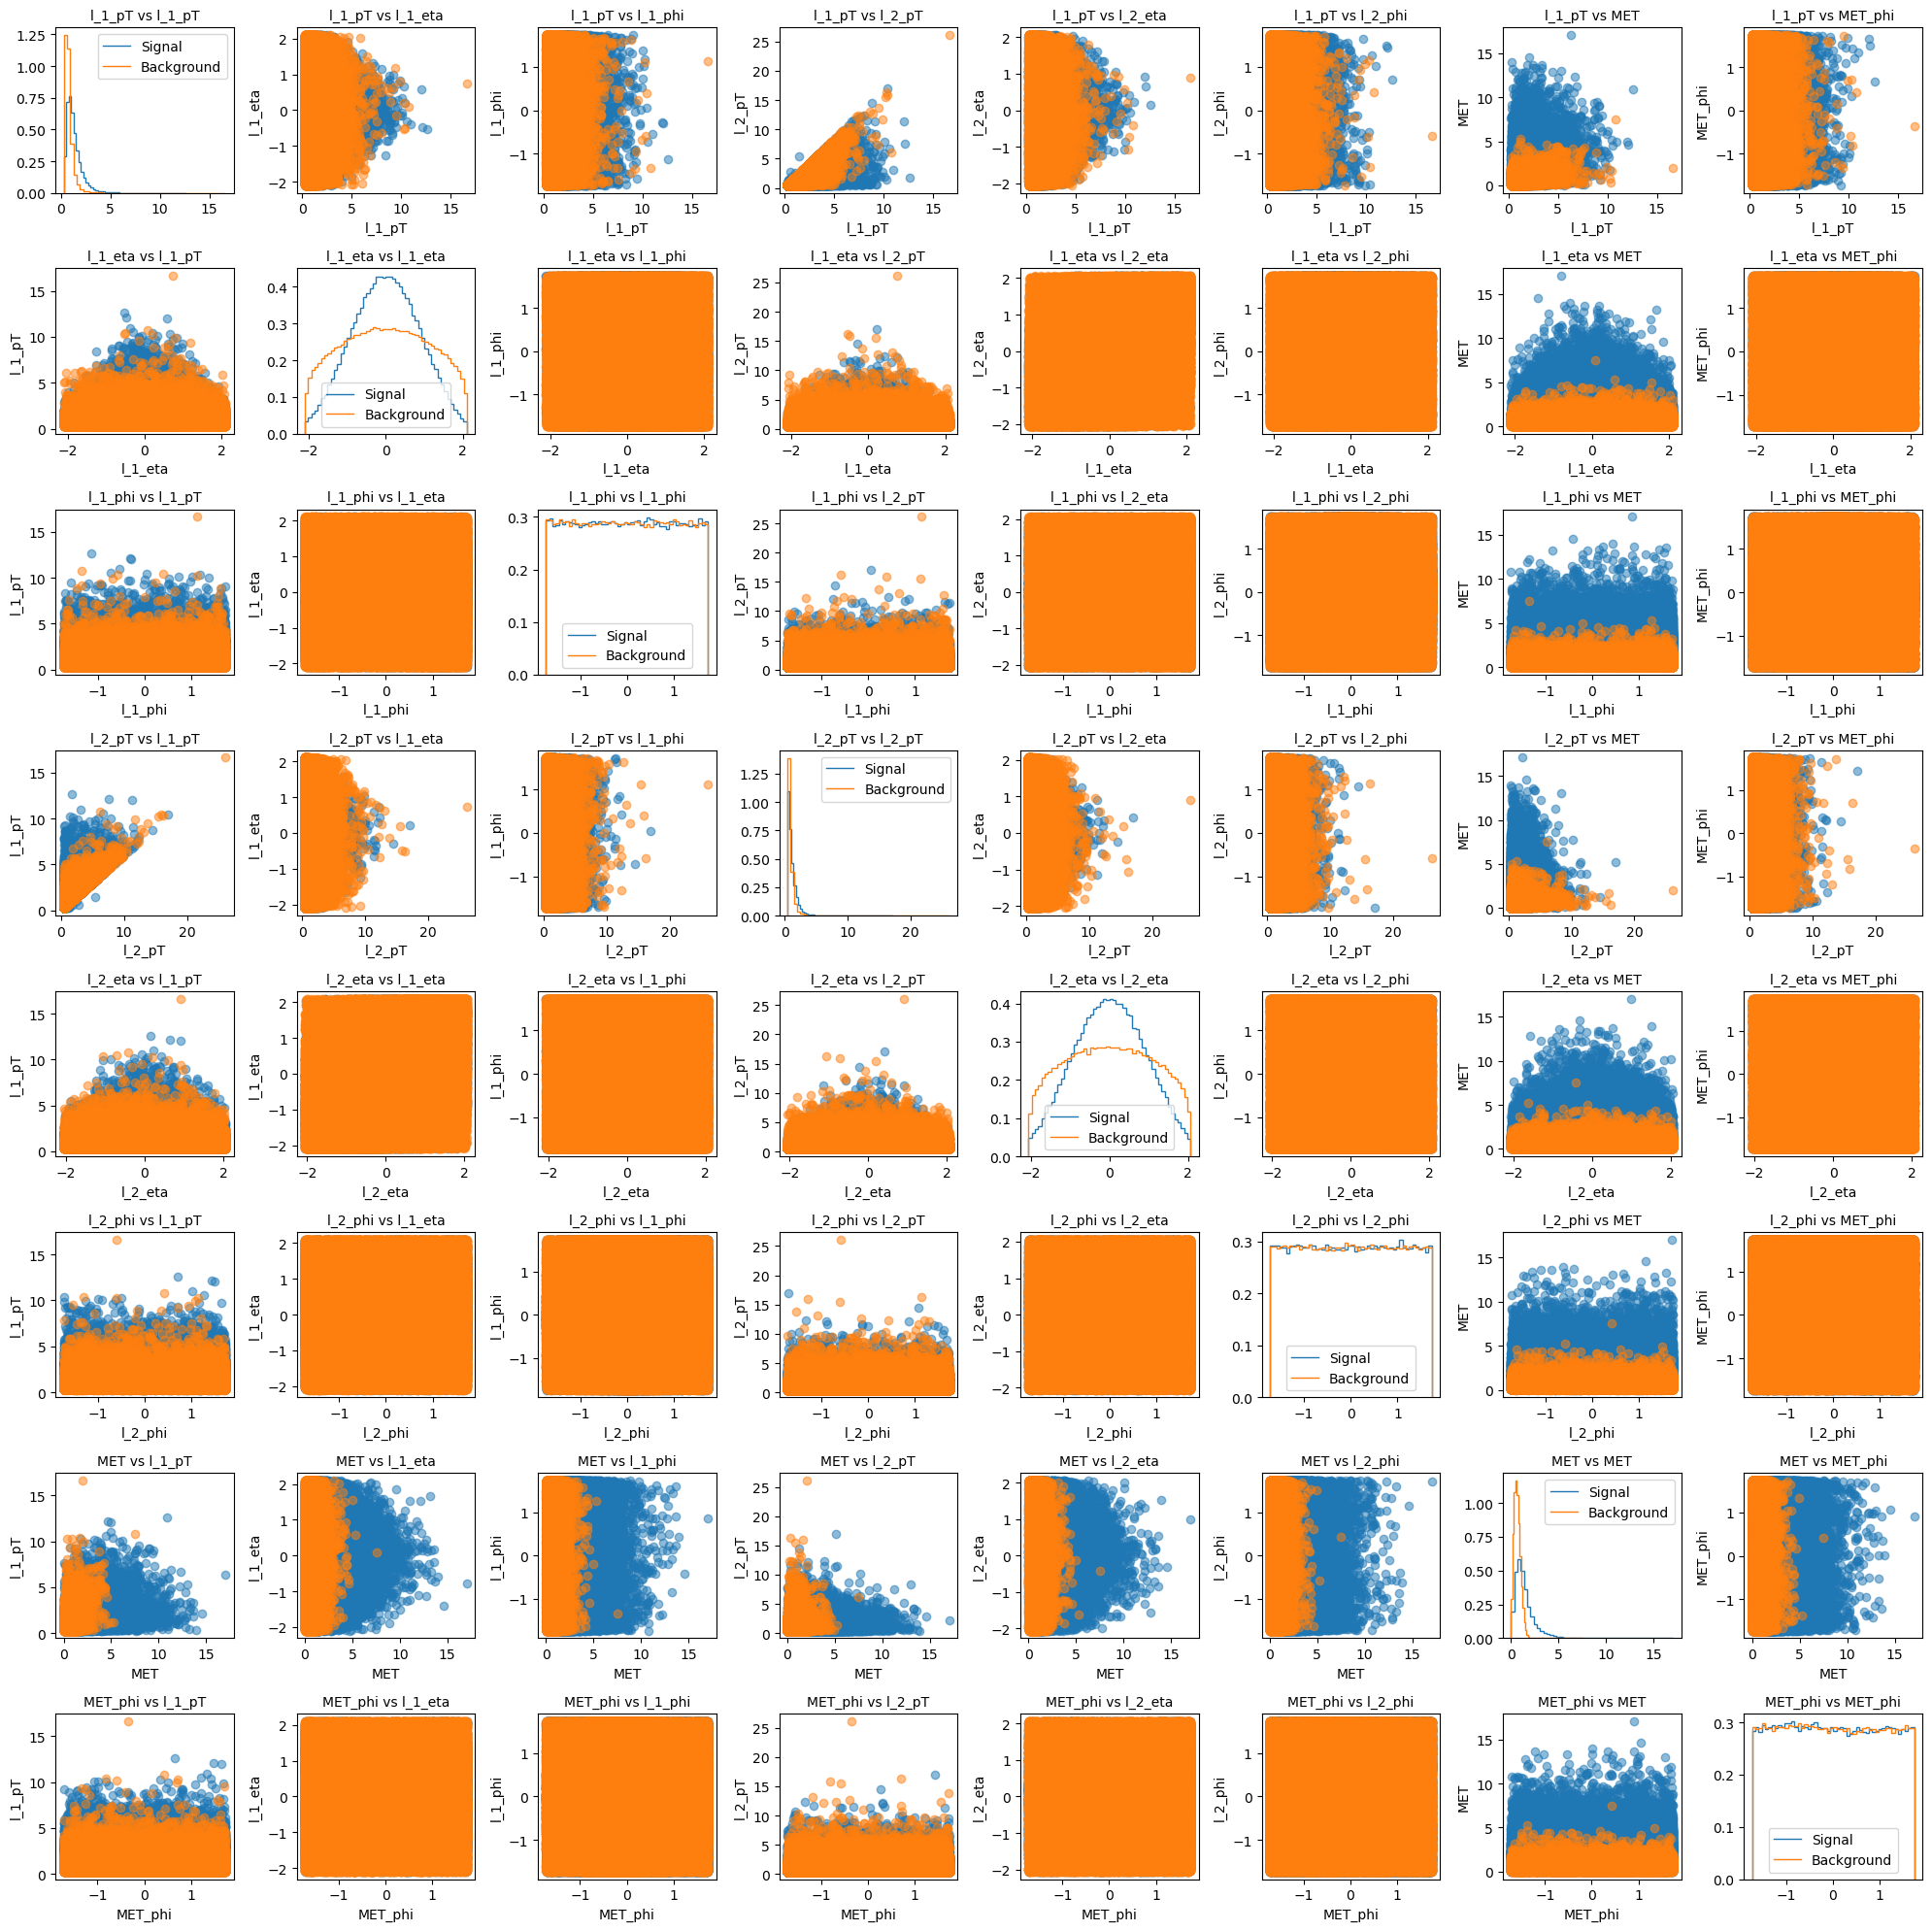

CPU times: user 53.7 s, sys: 1.31 s, total: 55 s
Wall time: 55.7 s


In [81]:
%%time
#Part b: Modifying pair plot function using numpy array. Plotting low-level features.

import numpy as np
import matplotlib.pyplot as plt

#Use numpy array intead of pandas df
df_array = df_low.to_numpy()

#Do dictionary using np
selection_dict = {"Signal": df["signal"].to_numpy() == 1,
                "Background": df["signal"].to_numpy() == 0}

def compare_distributions_mod(df_array, column_index, selections, ax, **kwargs):
    for label, selection in selections.items():
        data= df_array[selection, column_index]  #Index with NumPy 
        hist, bins = np.histogram(data, bins=50, density=True)  
        ax.stairs(hist, bins, label=label)  #Use stairs

    ax.legend()
        
def compare_scatter_mod(df_array, x_index, y_index, selections, ax, make_legend=True):
    for label, selection in selections.items():
        ax.scatter(df_array[selection, x_index], df_array[selection, y_index], label=label, alpha=0.5)

    ax.set_xlabel(columns[x_index])
    ax.set_ylabel(columns[y_index])

    if make_legend:
        ax.legend()

columns = df_low.columns[:]
n_columns = len(columns)

# Create subplots
fig, axes = plt.subplots(n_columns, n_columns, figsize=(20, 20), sharex=False, sharey=False)

for i, x_var_name in enumerate(columns):
    for j, y_var_name in enumerate(columns):
        ax = axes[i, j]  

        make_legend = (i == 0 and j == 0)  

        if i == j:
            compare_distributions_mod(df_array, i, selection_dict, ax, alpha=0.5)
        else:
            compare_scatter_mod(df_array, i, j, selection_dict, ax, make_legend=make_legend)

        ax.set_title(f"{x_var_name} vs {y_var_name}", fontsize=10)

plt.tight_layout()
plt.show()



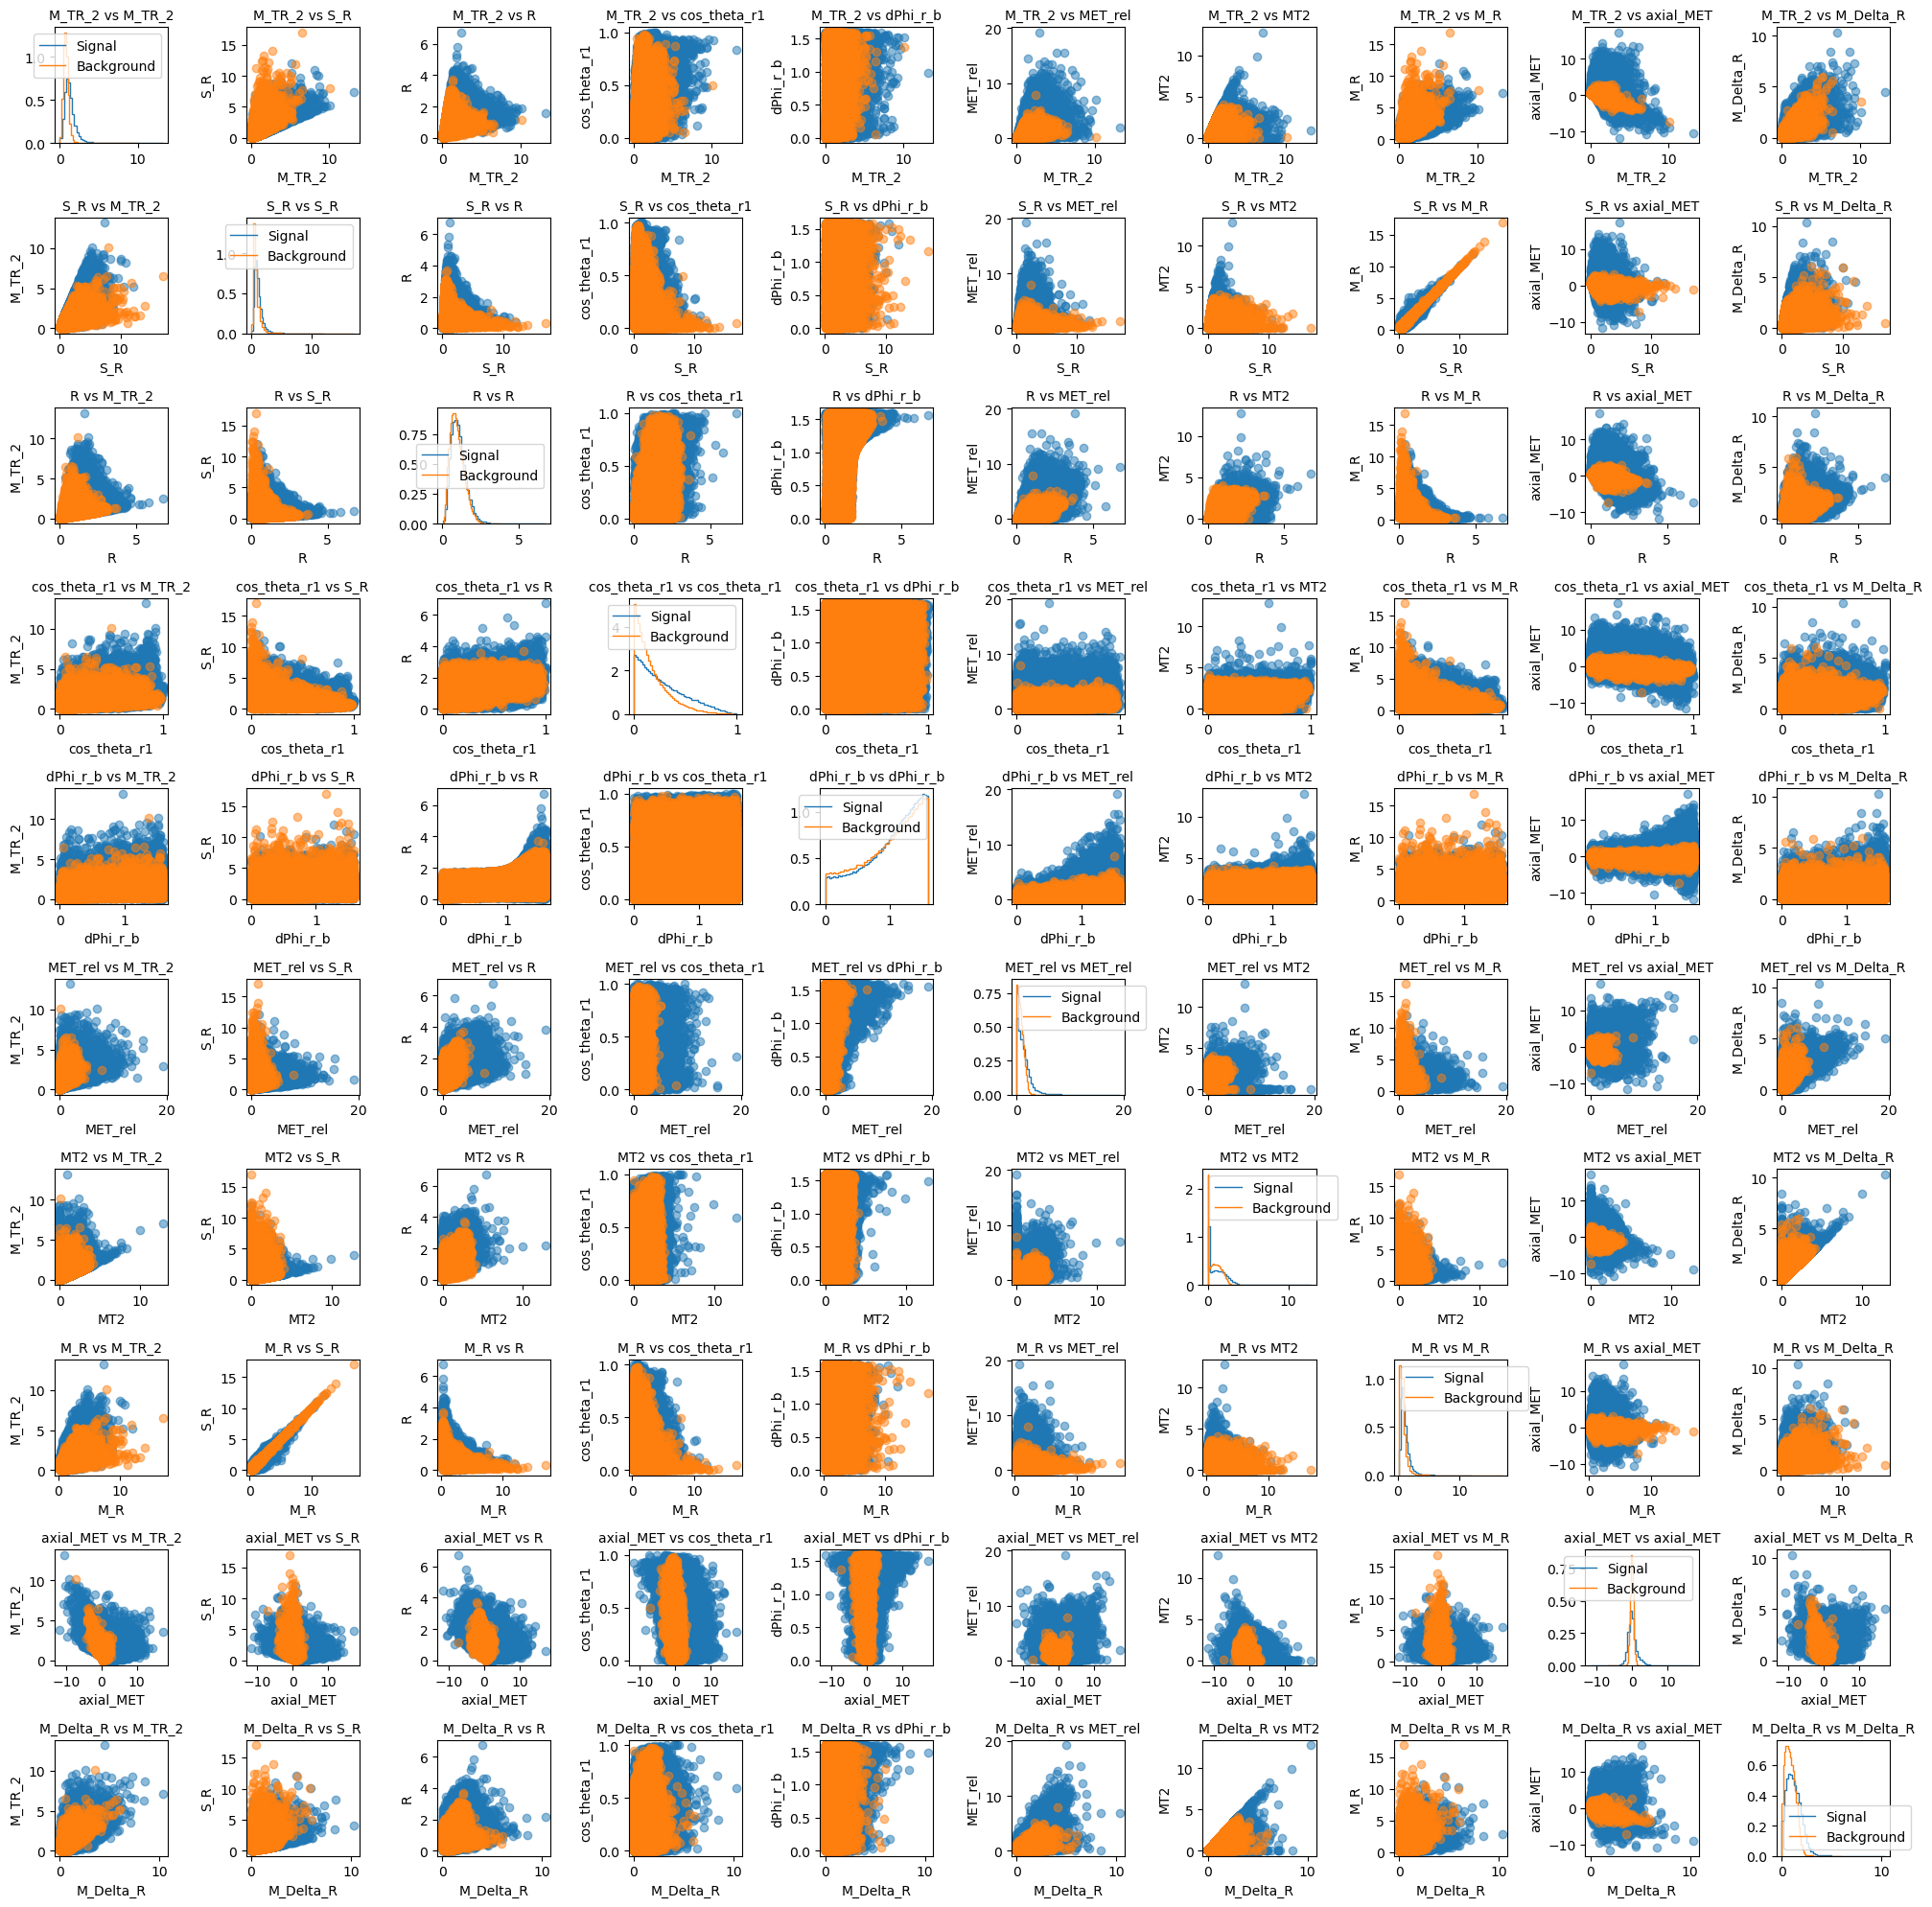

CPU times: user 1min 24s, sys: 1.6 s, total: 1min 26s
Wall time: 1min 27s


In [82]:
%%time
#Part b: Modifying pair plot function using numpy array. Plotting high-level features.

import numpy as np
import matplotlib.pyplot as plt

#Use numpy array intead of pandas df
df_array = df_high.to_numpy()

#Do dictionary using np
selection_dict = {"Signal": df["signal"].to_numpy() == 1,
                "Background": df["signal"].to_numpy() == 0}


columns = df_high.columns[:]
n_columns = len(columns)

# Create subplots
fig, axes = plt.subplots(n_columns, n_columns, figsize=(20, 20), sharex=False, sharey=False)

for i, x_var_name in enumerate(columns):
    for j, y_var_name in enumerate(columns):
        ax = axes[i, j]  

        make_legend = (i == 0 and j == 0)  

        if i == j:
            compare_distributions_mod(df_array, i, selection_dict, ax, alpha=0.5)
        else:
            compare_scatter_mod(df_array, i, j, selection_dict, ax, make_legend=make_legend)

        ax.set_title(f"{x_var_name} vs {y_var_name}", fontsize=10)

plt.tight_layout()
plt.show()



# Part c: Best Features XXXXXXXXX
The best features seem to be 

The best features seem to be MET, axial_MET, MET_rel, and cos_theta_r1

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [15]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

In [11]:
#Part b: Covariance and correlation matrix between all observables

#Get df as np array
df_array=df.to_numpy()

#Compute covariance matrix using np
cov_all=np.cov(df_array, rowvar=False)

#Compute correlation matrix using np
corr_all=np.corrcoef(df_array, rowvar=False)

In [14]:
#Part b: Covariance and correlation matrix for low-level features
df_low_arr=df_low.to_numpy()

#Compute covariance matrix using np
cov_low=np.cov(df_low_arr, rowvar=False)

#Compute correlation matrix using np
corr_low=np.corrcoef(df_low_arr, rowvar=False)

In [15]:
#Part b: Covariance and correlation matrix for high-level features
df_high_arr=df_high.to_numpy()

#Compute covariance matrix using np
cov_high=np.cov(df_high_arr, rowvar=False)

#Compute correlation matrix using np
corr_high=np.corrcoef(df_high_arr, rowvar=False)

In [ ]:
#Part c: Table of the covariance and correlation matrices

In [61]:
all_var_name=VarNames[1:]
len(all_var_name)

18

In [64]:
cov_all = cov_all.round(3)
corr_all = corr_all.round(3)

In [71]:
from tabulate import tabulate

pd.set_option("display.width", 200)
pd.set_option("display.max_columns", None)

print("Covariance Matrix for All Features")
print(tabulate(cov_all[:, :9], headers=all_var_name[:9], tablefmt="mixed_grid"))
print(tabulate(cov_all[:, 9:], headers=all_var_name[9:], tablefmt="mixed_grid"))


print("\nCorrelation Matrix for All Features:")
print(tabulate(corr_all[:, :9], headers=all_var_name[:9], tablefmt="mixed_grid"))
print(tabulate(corr_all[:, 9:], headers=all_var_name[9:], tablefmt="mixed_grid"))


Covariance Matrix for All Features
┍━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━┑
│   l_1_pT │   l_1_eta │   l_1_phi │   l_2_pT │   l_2_eta │   l_2_phi │    MET │   MET_phi │   MET_rel │
┝━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━┥
│    0.248 │     0.133 │     0     │    0     │     0.064 │     0.001 │  0     │     0.191 │    -0     │
├──────────┼───────────┼───────────┼──────────┼───────────┼───────────┼────────┼───────────┼───────────┤
│    0.133 │     0.467 │    -0     │    0     │     0.305 │    -0     │  0.001 │     0.228 │    -0.001 │
├──────────┼───────────┼───────────┼──────────┼───────────┼───────────┼────────┼───────────┼───────────┤
│    0     │    -0     │     1.004 │   -0.001 │    -0     │     0.408 │ -0.001 │    -0.002 │    -0.001 │
├──────────┼───────────┼───────────┼──────────┼───────────┼───────────┼────────┼───────────┼───────────┤
│    0     │     0  

In [30]:
cov_low = cov_low.round(3)
corr_low = corr_low.round(3)

In [31]:
from tabulate import tabulate

print("Covariance Matrix for Low-Level Features")
print(tabulate(cov_low, headers=df_low, tablefmt='mixed_grid'))

print("\nCorrelation Matrix for Low-Level Features:")
print(tabulate(corr_low, headers=df_low, tablefmt='mixed_grid'))


Covariance Matrix for Low-Level Features
┍━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━┯━━━━━━━━━━━┑
│   l_1_pT │   l_1_eta │   l_1_phi │   l_2_pT │   l_2_eta │   l_2_phi │    MET │   MET_phi │
┝━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━┿━━━━━━━━━━━┥
│    0.467 │    -0     │     0     │    0.305 │    -0     │     0.001 │  0.228 │    -0.001 │
├──────────┼───────────┼───────────┼──────────┼───────────┼───────────┼────────┼───────────┤
│   -0     │     1.004 │    -0.001 │   -0     │     0.408 │    -0.001 │ -0.002 │    -0.001 │
├──────────┼───────────┼───────────┼──────────┼───────────┼───────────┼────────┼───────────┤
│    0     │    -0.001 │     1.004 │    0.001 │     0     │    -0.267 │  0.001 │    -0.185 │
├──────────┼───────────┼───────────┼──────────┼───────────┼───────────┼────────┼───────────┤
│    0.305 │    -0     │     0.001 │    0.425 │    -0.001 │     0     │  0.079 │    -0.002 │
├──────────┼───────────┼─────

In [72]:
cov_high = cov_high.round(3)
corr_high = corr_high.round(3)

In [73]:
print("Covariance Matrix for High-Level Features")
print(tabulate(cov_high, headers=df_high, tablefmt='mixed_grid'))

print("\nCorrelation Matrix for High-Level Features:")
print(tabulate(corr_high, headers=df_high, tablefmt='mixed_grid'))


Covariance Matrix for High-Level Features
┍━━━━━━━━━━┯━━━━━━━━┯━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━┯━━━━━━━━┯━━━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│   M_TR_2 │    S_R │      R │   cos_theta_r1 │   dPhi_r_b │   MET_rel │    MT2 │    M_R │   axial_MET │   M_Delta_R │
┝━━━━━━━━━━┿━━━━━━━━┿━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━┿━━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│    0.338 │  0.228 │  0.104 │          0.052 │      0.058 │     0.302 │  0.189 │  0.21  │      -0.185 │       0.242 │
├──────────┼────────┼────────┼────────────────┼────────────┼───────────┼────────┼────────┼─────────────┼─────────────┤
│    0.228 │  0.382 │ -0.083 │         -0.01  │     -0.003 │     0.082 │ -0.011 │  0.38  │      -0.041 │       0.096 │
├──────────┼────────┼────────┼────────────────┼────────────┼───────────┼────────┼────────┼─────────────┼─────────────┤
│    0.104 │ -0.083 │  0.222 │          0.058 │      0.087 │     0.249 │  0.232 │ -0.113 │      -0.181 │       0.165 │
├─────

In [ ]:
#Part d: Function that takes a dataset and appropriate arguments and performs steps b and c.

In [75]:
def corr_and_cov_table(dataset, header_names):

    #Get df as np array
    df_array=dataset.to_numpy()
    
    #Compute covariance matrix using np
    cov_all=np.cov(dataset, rowvar=False)
    
    #Compute correlation matrix using np
    corr_all=np.corrcoef(dataset, rowvar=False)

    cov_all = cov_all.round(3)
    corr_all = corr_all.round(3)
    
    print("Covariance Matrix")
    print(tabulate(cov_all, headers=header_names, tablefmt='mixed_grid'))
    
    print("\nCorrelation Matrix")
    print(tabulate(cov_all, headers=header_names, tablefmt='mixed_grid'))


In [76]:
corr_and_cov_table(df_low, df_low)

Covariance Matrix
┍━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━┯━━━━━━━━━━━┑
│   l_1_pT │   l_1_eta │   l_1_phi │   l_2_pT │   l_2_eta │   l_2_phi │    MET │   MET_phi │
┝━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━┿━━━━━━━━━━━┥
│    0.467 │    -0     │     0     │    0.305 │    -0     │     0.001 │  0.228 │    -0.001 │
├──────────┼───────────┼───────────┼──────────┼───────────┼───────────┼────────┼───────────┤
│   -0     │     1.004 │    -0.001 │   -0     │     0.408 │    -0.001 │ -0.002 │    -0.001 │
├──────────┼───────────┼───────────┼──────────┼───────────┼───────────┼────────┼───────────┤
│    0     │    -0.001 │     1.004 │    0.001 │     0     │    -0.267 │  0.001 │    -0.185 │
├──────────┼───────────┼───────────┼──────────┼───────────┼───────────┼────────┼───────────┤
│    0.305 │    -0     │     0.001 │    0.425 │    -0.001 │     0     │  0.079 │    -0.002 │
├──────────┼───────────┼───────────┼──────────┼─────

In [77]:
corr_and_cov_table(df_high, df_high)

Covariance Matrix
┍━━━━━━━━━━┯━━━━━━━━┯━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━┯━━━━━━━━┯━━━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│   M_TR_2 │    S_R │      R │   cos_theta_r1 │   dPhi_r_b │   MET_rel │    MT2 │    M_R │   axial_MET │   M_Delta_R │
┝━━━━━━━━━━┿━━━━━━━━┿━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━┿━━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│    0.338 │  0.228 │  0.104 │          0.052 │      0.058 │     0.302 │  0.189 │  0.21  │      -0.185 │       0.242 │
├──────────┼────────┼────────┼────────────────┼────────────┼───────────┼────────┼────────┼─────────────┼─────────────┤
│    0.228 │  0.382 │ -0.083 │         -0.01  │     -0.003 │     0.082 │ -0.011 │  0.38  │      -0.041 │       0.096 │
├──────────┼────────┼────────┼────────────────┼────────────┼───────────┼────────┼────────┼─────────────┼─────────────┤
│    0.104 │ -0.083 │  0.222 │          0.058 │      0.087 │     0.249 │  0.232 │ -0.113 │      -0.181 │       0.165 │
├──────────┼────────┼────────┼

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 